In [101]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
plt.style.use('classic')
from matplotlib.backends.backend_pdf import PdfPages

% matplotlib inline
%load_ext autoreload
% autoreload

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
df = pd.read_csv('/data/good data storage.csv')

In [103]:
df.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [67]:
df[df['File name']==2017062804]

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
104,2017062804,24,2,0,1,0,1,5,8,13,0,NaN,IE_high_low


In [68]:
trial = '/data/test2017051503'
trial = sio.loadmat(trial)

In [69]:
data = trial['test'][0]

In [70]:
test_pip = 2
index = 5
trace_e = data[index][0][0][0][0][test_pip-1][0][0][1]

In [71]:
trace_e.shape

(13, 22500)

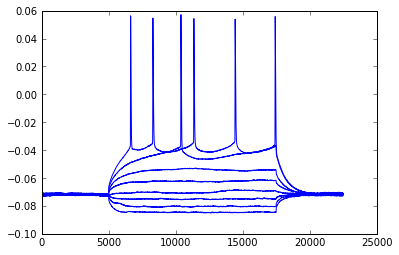

In [72]:
plt.plot(trace_e.transpose()[:,5:], 'b')
with PdfPages('/data/Figure0_3.pdf') as pdf:
    pdf.savefig()

In [73]:
test_pip = 1
index = 4
trace_i = data[index][0][0][0][0][test_pip-1][0][0][1]

In [74]:
trace_i.shape

(12, 20000)

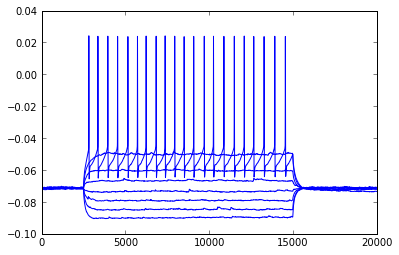

In [75]:
plt.plot(trace_i.transpose()[:,3:-1], 'b')
with PdfPages('/data/Figure0_4.pdf') as pdf:
    pdf.savefig()

In [77]:
trial = '/data/test2017062804'
trial = sio.loadmat(trial)

In [78]:
data = trial['test'][0]

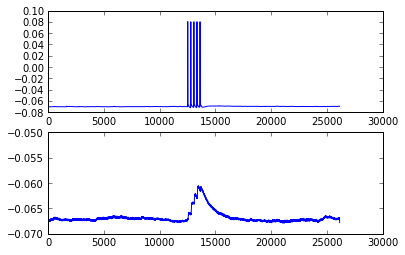

In [96]:
pre_pip = 1
post_pip = 2
index = 0
trace_pre = data[index][0][0][0][0][pre_pip-1][0][0][1].transpose()
trace_post = data[index][0][0][0][0][post_pip-1][0][0][1].transpose()

fig, ax = plt.subplots(2,1)
ax[0].plot(trace_pre)
ax[1].plot(trace_post)
ax[1].set_ylim([-0.07, -0.05])
with PdfPages('/data/Figure0_5.pdf') as pdf:
    pdf.savefig()

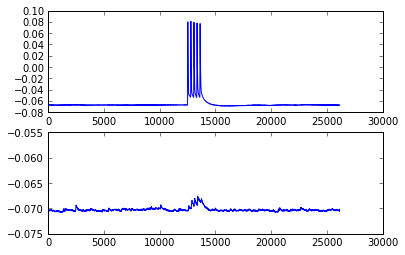

In [97]:
pre_pip = 2
post_pip = 1
index = 1
trace_pre = data[index][0][0][0][0][pre_pip-1][0][0][1].transpose()
trace_post = data[index][0][0][0][0][post_pip-1][0][0][1].transpose()

fig, ax = plt.subplots(2,1)
ax[0].plot(trace_pre)
ax[1].plot(trace_post)
ax[1].set_ylim([-0.075, -0.055])
with PdfPages('/data/Figure0_6.pdf') as pdf:
    pdf.savefig()

In [135]:
# Visualize paired pulse ratio
trial = '/data/test2017062804'
trial = sio.loadmat(trial)

In [136]:
data = trial['test'][0]

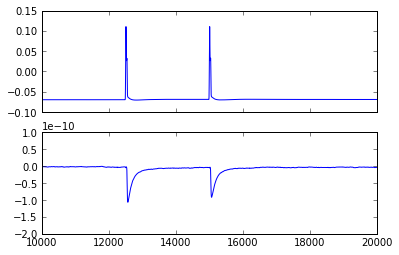

In [137]:
pre_pip = 1
post_pip = 2
index = 4
trace_pre = data[index][0][0][0][0][pre_pip-1][0][0][1].transpose()
trace_post = data[index][0][0][0][0][post_pip-1][0][0][1].transpose()

fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(np.mean(trace_pre, axis=1))
ax[1].plot(np.mean(trace_post, axis=1))
ax[0].set_xlim([10000, 20000])
ax[1].set_ylim([-2e-10, 1e-10])

with PdfPages('/data/Figure0_6.pdf') as pdf:
    pdf.savefig()

In [132]:
df[(df['E-I']==0)&(df['IS100']==1)].head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
6,2016092601,26,1,0,1,1,1,"13,14","16,17,18,19",1,6,NaN,50Hz IE preonly
7,2016091502,25,2,0,1,0,1,3,"6,7",1,3,NaN,50Hz IE preonly


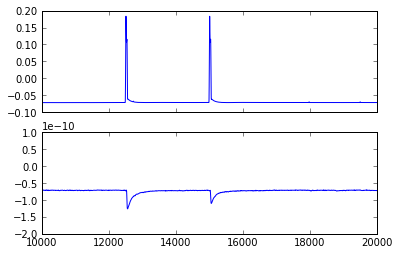

In [138]:
# Visualize paired pulse ratio
trial = '/data/test2016091403'
trial = sio.loadmat(trial)
data = trial['test'][0]
pre_pip = 1
post_pip = 2
index = 17
trace_pre = data[index][0][0][0][0][pre_pip-1][0][0][1].transpose()
trace_post = data[index][0][0][0][0][post_pip-1][0][0][1].transpose()

fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(np.mean(trace_pre, axis=1))
ax[1].plot(np.mean(trace_post, axis=1))
ax[0].set_xlim([10000, 20000])
ax[1].set_ylim([-2e-10, 1e-10])

with PdfPages('/data/Figure0_7.pdf') as pdf:
    pdf.savefig()